In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_path = "../reports"

model_list = ["UNet++", "AttentionUNet", "UNet", "VNet", "NoSkipUNet", "NoSkipVNet"]
anatomy_list = ["BUSI", "GLaS", "Heart", "Spleen"]
anatomy_alias = {"BUSI": "Breast \n (Ultrasound)", "GLaS": "Colon \n (Histology)", "Heart": "Heart \n (MRI)", "Spleen": "Spleen \n (CT)"}
variant_list = ["lower", "low", "in-domain", "high", "higher"]
variant_alias = {"lower": "Hardest", "low": "Harder", "in-domain": "In-domain", "high": "Easier", "higher": "Easiest"}

In [3]:
sdist_mean_data = {}
sdist_std_data = {}

for texture_variant in ["lower", "low", "in-domain", "high", "higher"]:
    sdist_mean = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    sdist_sd = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    for anatomy in anatomy_list:
        for model_name in model_list:
            result_seed_1 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_1.csv")
            result_seed_2 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_2.csv")
            result_seed_3 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_3.csv")

            seed_1_data = pd.read_csv(result_seed_1)
            seed_1_data = seed_1_data.loc[seed_1_data['Set'] == "test"]

            seed_2_data = pd.read_csv(result_seed_2)
            seed_2_data = seed_2_data.loc[seed_2_data['Set'] == "test"]

            seed_3_data = pd.read_csv(result_seed_3)
            seed_3_data = seed_3_data.loc[seed_3_data['Set'] == "test"]

            sdist_scores = np.hstack((seed_1_data["SurfaceDistance"].to_numpy(), seed_2_data["SurfaceDistance"].to_numpy(), seed_3_data["SurfaceDistance"].to_numpy()))
            sdist_scores[~np.isfinite(sdist_scores)] = np.sqrt(2) * 256

            #print("For anatomy: " + anatomy + " and model: " + model_name + " and texture: " + texture_variant + ", sdist mean: " + str(np.nanmean(sdist_scores)) + ", std: " + str(np.nanstd(sdist_scores)))

            sdist_mean[model_name][anatomy] = np.mean(sdist_scores)
            sdist_sd[model_name][anatomy] = np.std(sdist_scores)
    
    sdist_mean_data[texture_variant] = sdist_mean
    sdist_std_data[texture_variant] = sdist_sd
    
    print("For texture variant: " + str(texture_variant) + " mean scores;")
    print(sdist_mean)
    print("For texture variant: " + str(texture_variant) + " std scores;")
    print(sdist_sd)


For texture variant: lower mean scores;
            UNet++ AttentionUNet        UNet        VNet NoSkipUNet  \
BUSI     55.004668     23.838157   37.424352   21.146936  26.401135   
GLaS     32.189114     28.807466   32.289809   29.172389   33.29598   
Heart   359.141408     68.385874  163.450497    3.124445   2.403867   
Spleen  361.626853     53.235226  230.787126  349.002514  40.775815   

        NoSkipVNet  
BUSI     10.680696  
GLaS      27.98573  
Heart     1.435238  
Spleen  125.179297  
For texture variant: lower std scores;
           UNet++ AttentionUNet        UNet       VNet NoSkipUNet  NoSkipVNet
BUSI    21.589514      23.57217   73.495264  56.992318   59.38691   37.542083
GLaS    66.295493     66.851119   66.478836  66.968523  66.138321   66.958628
Heart   31.605549     27.667071  175.650723  18.984621   1.259114    0.811588
Spleen  10.475116     33.775422  153.876105  60.041917  90.919533  163.023388
For texture variant: low mean scores;
            UNet++ AttentionUNet

In [4]:
for model_name in model_list:
    for anatomy in anatomy_list:
        mean_list = []
        for texture_variant in variant_list:
            mean_list.append(sdist_mean_data[texture_variant][model_name][anatomy])
        mu = np.mean(mean_list)
        sigma = np.std(mean_list)
        cv = sigma/mu
        print("For " + anatomy + " and model: " + model_name + ", CV = " + str(cv))

For BUSI and model: UNet++, CV = 0.7909595003808333
For GLaS and model: UNet++, CV = 0.11355329237701643
For Heart and model: UNet++, CV = 0.5197968563240676
For Spleen and model: UNet++, CV = 0.5078712691061706
For BUSI and model: AttentionUNet, CV = 0.3324376839661423
For GLaS and model: AttentionUNet, CV = 0.06575400255002939
For Heart and model: AttentionUNet, CV = 1.152876932450345
For Spleen and model: AttentionUNet, CV = 0.5327292486469174
For BUSI and model: UNet, CV = 0.1896131749765761
For GLaS and model: UNet, CV = 0.0851915305897343
For Heart and model: UNet, CV = 1.5745407759054946
For Spleen and model: UNet, CV = 0.5515261089632433
For BUSI and model: VNet, CV = 0.12710389507727615
For GLaS and model: VNet, CV = 0.07006581210617702
For Heart and model: VNet, CV = 0.5251291647736864
For Spleen and model: VNet, CV = 0.5013565946232266
For BUSI and model: NoSkipUNet, CV = 0.17309845998446904
For GLaS and model: NoSkipUNet, CV = 0.15748805842747662
For Heart and model: NoSkip

<Figure size 640x480 with 0 Axes>

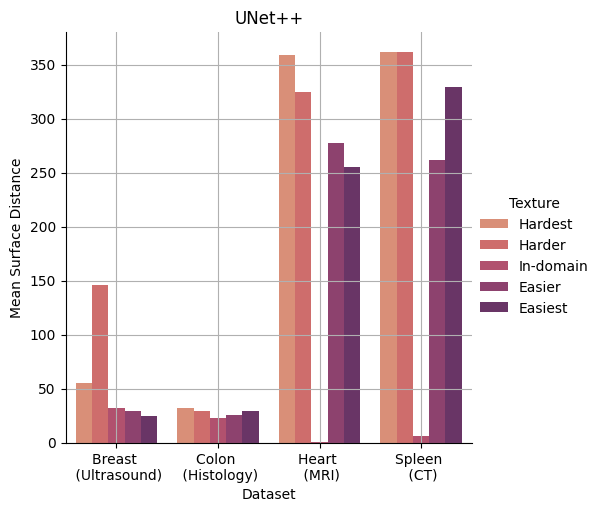

<Figure size 640x480 with 0 Axes>

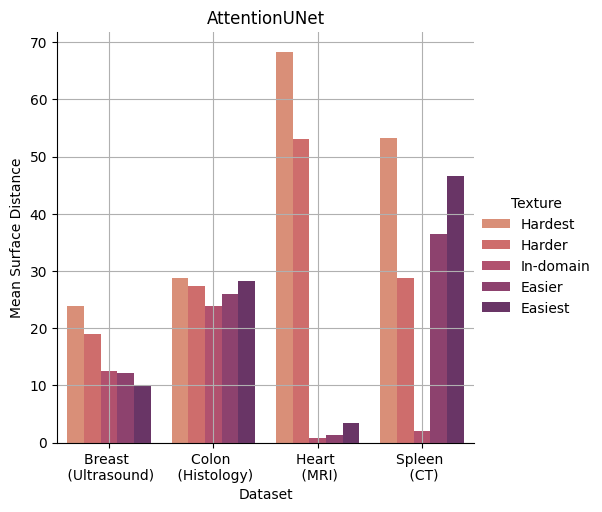

<Figure size 640x480 with 0 Axes>

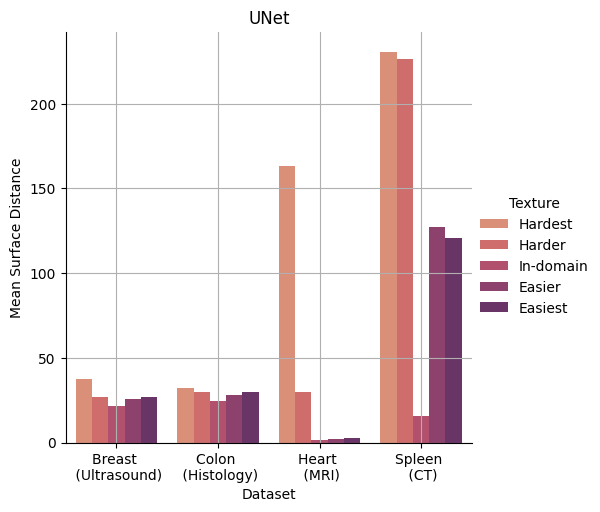

<Figure size 640x480 with 0 Axes>

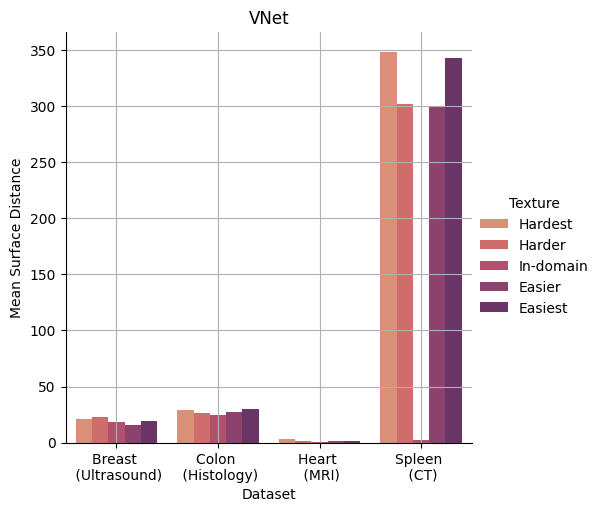

<Figure size 640x480 with 0 Axes>

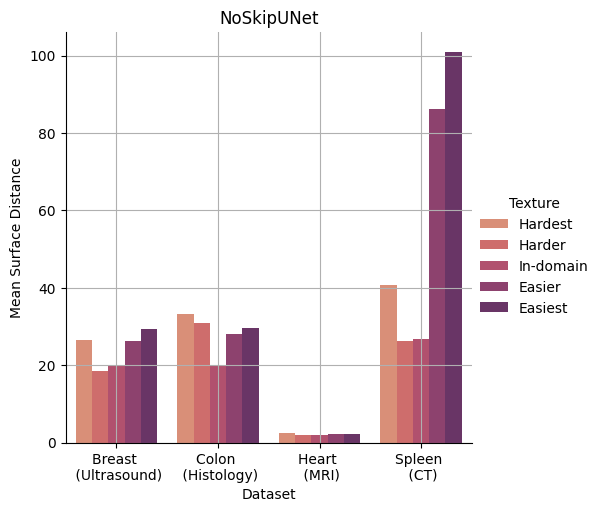

<Figure size 640x480 with 0 Axes>

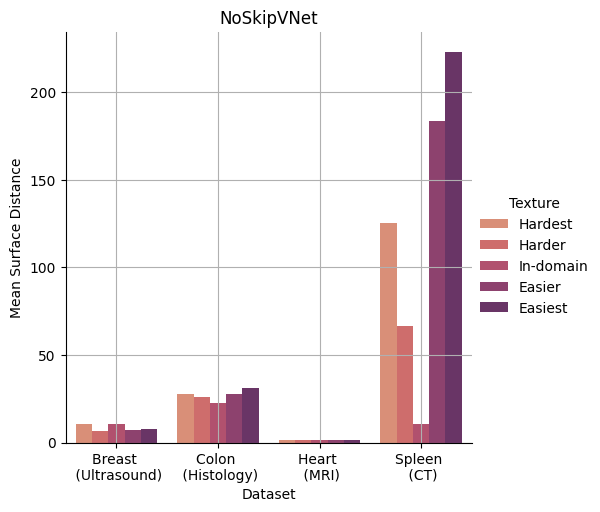

In [5]:
for model_type in model_list:
    data_results = []
    for image_type in anatomy_list:
        for variant in variant_list:
            data_results.append([variant_alias[variant], model_type, anatomy_alias[image_type], sdist_mean_data[variant][model_type][image_type]])

    plt.figure()
    df = pd.DataFrame(data_results, columns=["Texture", "Model", "Dataset", "Mean Surface Distance"])
    sns.catplot(data=df, kind="bar", x="Dataset", y="Mean Surface Distance", hue="Texture", palette='flare')
    plt.title(model_type)
    plt.grid(True)